# Mappeoppgave 1 - Samfunnsøkonomisk analyse av en turistskatt

### Kandidat Number: --

In [268]:
# SETUP

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy.solvers import solve

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab

from pyjstat import pyjstat
import requests

from IPython.display import display, HTML

# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1","#87CEEB","#F08080"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
#print("finish")

In [269]:
# create graph function
def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

In [468]:
POST_URL = "https://data.ssb.no/api/v0/no/table/10638/"

payload = {
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK",
          "UTLK",
          "NOHT",
          "NONF"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "0",
          "01",
          "01.01",
          "01.02",
          "01.03",
          "01.04",
          "01.05",
          "01.06",
          "01.07",
          "01.08",
          "01.09",
          "01.10",
          "02"
        ]
      }
    },
       {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(POST_URL, json = payload)
dataset = pyjstat.Dataset.read(resultat.text)
df_raw = dataset.write('dataframe')
source_ssb_konsum = "https://www.ssb.no/statbank/table/10638/"

POST_URL = "https://data.ssb.no/api/v0/no/table/10603/"

payload = {
  "query": [
    {
      "code": "HovedstReise",
      "selection": {
        "filter": "item",
        "values": [
          "BPROD"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRBSD",
          "TRSF",
          "TRF",
          "UTL",
          "RBAV",
          "KUV",
          "SAF"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(POST_URL, json = payload)
dataset = pyjstat.Dataset.read(resultat.text)
df_raw2 = dataset.write('dataframe')
source_ssb_reiselivsN = "https://www.ssb.no/statbank/table/10603/"


In [605]:
pd.set_option('display.max_rows', None)
df_raw['år'] = df_raw['år'].astype(int)
df_raw2['år'] = df_raw2['år'].astype(int)
df_raw['value'] = df_raw['value'].astype(float)
df_raw2['value'] = df_raw2['value'].astype(float)
df_raw=df_raw.dropna()
df_raw2=df_raw2.dropna()
#display(df)
#display(df2)
#display(df_raw[df_raw['år']==2020])
#display(df_raw2[df_raw2['år']==2020])

#Turist Growth Data
# Need to find DATA

#Nering Growth Data
df_overnight = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Overnattingsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_service = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Serveringsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_trasport_land = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Transport med buss, sporvei og drosje")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_trasport_sea = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Transport med skip og ferger")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_trasport_air = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Transport med fly")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_travel_service = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Reisebyrå- og reisearrangørvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_entertainmetn = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Kultur- og underholdningsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]
df_sport = df_raw2.loc[(df_raw2['reiselivsnæring'] == "Sport og annen fritidsvirksomhet")][[x for n in ([df_raw2.columns[1]],list(df_raw2.columns[-2:])) for x in n]]

#display(df_overnight)

#Turist VS Norwegian Data
#[df_total_konsum['år'].isin([2011,2019,2020])]

df_konsum_11 = df_raw.loc[(df_raw['reiselivsnæring'] == "Turistkonsum i alt") & (df_raw['år'] == 2011)]
df_konsum_19 = df_raw.loc[(df_raw['reiselivsnæring'] == "Turistkonsum i alt") & (df_raw['år'] == 2019)]
df_konsum_20 = df_raw.loc[(df_raw['reiselivsnæring'] == "Turistkonsum i alt") & (df_raw['år'] == 2020)]

df_housekonsum_19 = df_raw.loc[(df_raw['reiselivsnæring'] == "Overnattingstjenester") & (df_raw['år'] == 2019)]

df_total_turist_konsum = df_raw.loc[(df_raw['konsumentgruppe'] == "Utlendingenes konsum i Norge") & (df_raw['år']==2019)]
df_total_n_konsum = df_raw.loc[(df_raw['konsumentgruppe'] == "Norske husholdningers turistkonsum i Norge") & (df_raw['år']==2019)]
df_total_nering_konsum = df_raw.loc[(df_raw['konsumentgruppe'] == "Norske næringers utgifter til forretningsreiser i Norge") & (df_raw['år']==2019)]


#display(df_overnatt_turist_konsum)
#display(df_total_turist_konsum[df_total_turist_konsum['år'].isin([2011,2019])])
#display(df_total_n_konsum[df_total_n_konsum['år'].isin([2011,2019])])
#display(df_total_nering_konsum[df_total_n_konsum['år'].isin([2011,2019])])


In [601]:
for I,T in enumerate(list(df_total_turist_konsum["value"])):
    N = list(df_total_n_konsum["value"])[I]
    B = list(df_total_nering_konsum["value"])[I]
    
    maxl = max([T,N,B])
    if T == maxl:
        print(f'T: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {T}')
    elif N == maxl:
        print(f'N: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {N}')
    else:
        print(f'T: {str(list(df_total_nering_konsum["reiselivsnæring"])[I])} - {T}')

N: Turistkonsum i alt - 109080.0
N: Reiselivsprodukter i alt - 66502.0
T: Overnattingstjenester - 8644.0
N: Serveringstjenester - 10398.0
N: Transport med jernbane - 2006.0
N: Transport med buss og drosje - 3593.0
N: Transport med skip og ferger - 6425.0
N: Transport med fly - 17355.0
T: Utleie av transportmidler - 380.0
N: Reisebyrå- og reisearrangørtjenester - 18112.0
N: Kultur- og underholdningstjenester - 1708.0
N: Sports- og fritidstjenester - 1990.0
N: Turistkonsum utenom reiselivsprodukter - 42668.0


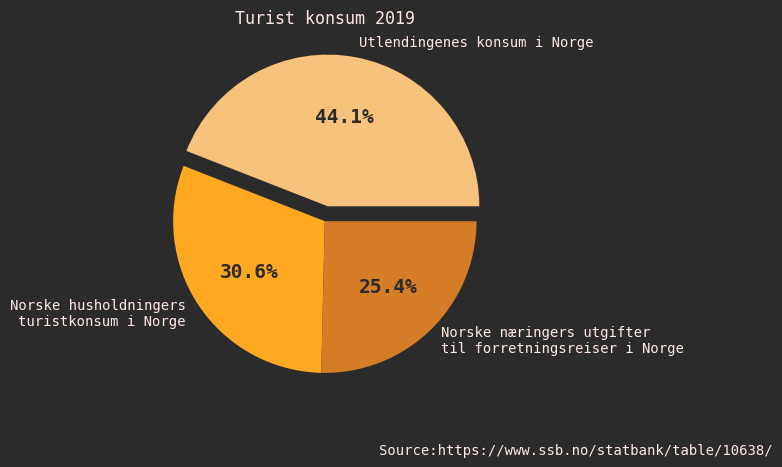

In [604]:
def graph_overnattingstjenester_konsum_pie():
    
    # Settup
    graph_Xmin = -0.5
    graph_Xmax = 100
    graph_Ymin = 0
    graph_Ymax = 100

    Titel = 'Turist konsum 2019'
    
    #Create
    
    konsum_overnatt_total = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Totalt konsum")]["value"])
    konsum_overnatt_turist = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Utlendingenes konsum i Norge")]["value"])
    konsum_overnatt_n = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Norske husholdningers turistkonsum i Norge")]["value"])
    konsum_overnatt_nering = int(df_housekonsum_19.loc[(df_housekonsum_19['konsumentgruppe'] == "Norske næringers utgifter til forretningsreiser i Norge")]["value"])

    
    konsum_percent_overnatt_turist = konsum_overnatt_turist/konsum_overnatt_total*100
    konsum_percent_overnatt_norsk = konsum_overnatt_n/konsum_overnatt_total*100
    konsum_percent_overnatt_forreting = konsum_overnatt_nering/konsum_overnatt_total*100

    konsum_overnatt_percent = [konsum_percent_overnatt_turist,konsum_percent_overnatt_norsk,konsum_percent_overnatt_forreting]
    konsum_overnatt_label = ["Utlendingenes konsum i Norge","Norske husholdningers\nturistkonsum i Norge", 'Norske næringers utgifter\ntil forretningsreiser i Norge']
    
    fig, ax = plt.subplots()
    
    # Graph    
    split_dis = (0.1, 0, 0) 
    _, txt, autotexts = ax.pie(konsum_overnatt_percent, 
                                       labels=konsum_overnatt_label,
                                       autopct='%1.1f%%',
                                       colors=["#f7c27c","#ffa822","#d57d26"],
                                       labeldistance=1.1,
                                       explode=split_dis
                                      )
    
    # Design    
    for autotext in autotexts:
        autotext.set_weight('bold')
        autotext.set_color('#2b2b2b')
        autotext.set_fontsize(14)
        
    ax.set_title(Titel)
    fig.text(0.6,0,"Source:%s"%(source_ssb_konsum))
    #return fig,ax

graph_overnattingstjenester_konsum_pie()

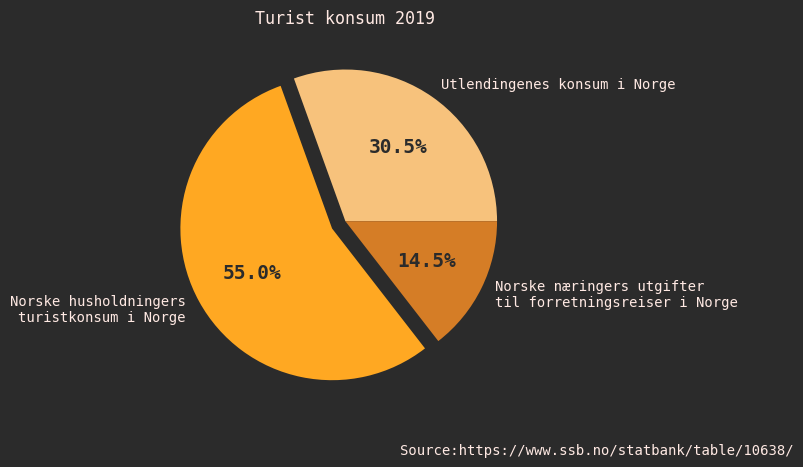

In [559]:
def graph_konsum_pie():
    
    # Settup
    graph_Xmin = -0.5
    graph_Xmax = 100
    graph_Ymin = 0
    graph_Ymax = 100

    Titel = 'Turist konsum 2019'
    
    #Create
    
    konsum_total = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == "Totalt konsum")]["value"])
    konsum_turist = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == "Utlendingenes konsum i Norge")]["value"])
    konsum_norsk = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == "Norske husholdningers turistkonsum i Norge")]["value"])
    konsum_forreting = int(df_konsum_19.loc[(df_raw['konsumentgruppe'] == 'Norske næringers utgifter til forretningsreiser i Norge')]["value"])
    
    konsum_percent_turist = konsum_turist/konsum_total*100
    konsum_percent_norsk = konsum_norsk/konsum_total*100
    konsum_percent_forreting = konsum_forreting/konsum_total*100

    konsum_percent = [konsum_percent_turist,konsum_percent_norsk,konsum_percent_forreting]
    konsum_label = ["Utlendingenes konsum i Norge","Norske husholdningers\nturistkonsum i Norge", 'Norske næringers utgifter\ntil forretningsreiser i Norge']
    
    fig, ax = plt.subplots()
    
    # Graph    
    split_dis = (0, 0.1, 0) 
    _, txt, autotexts = ax.pie(konsum_percent, 
                                       labels=konsum_label,
                                       autopct='%1.1f%%',
                                       colors=["#f7c27c","#ffa822","#d57d26"],
                                       labeldistance=1.1,
                                       explode=split_dis
                                      )
    
    # Design    
    for autotext in autotexts:
        autotext.set_weight('bold')
        autotext.set_color('#2b2b2b')
        autotext.set_fontsize(14)
        
    ax.set_title(Titel)
    fig.text(0.6,0,"Source:%s"%(source_ssb_konsum))
    #return fig,ax

graph_konsum_pie()

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot: title={'center': 'Turistkonsum i alt, base price 2020'}, ylabel='NOK (mill. kr)'>)

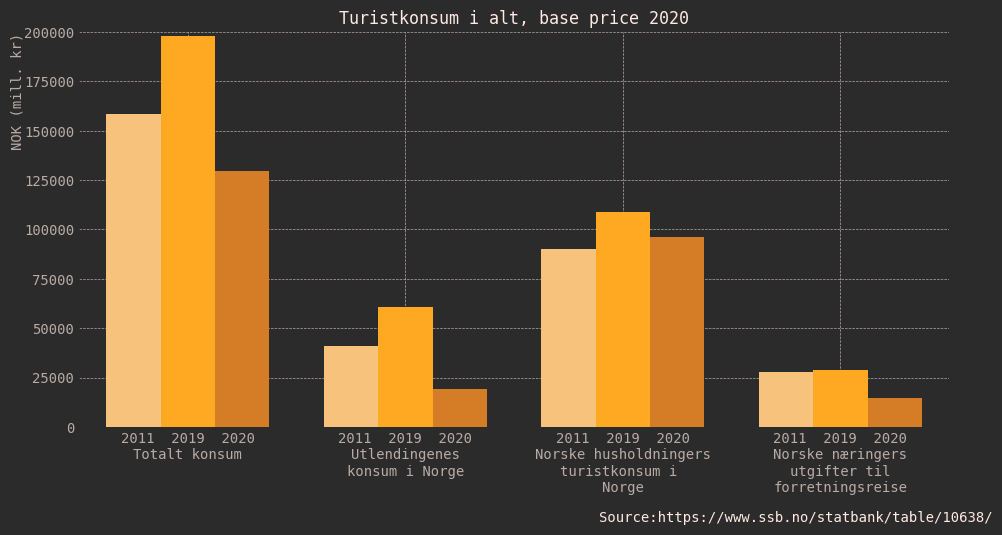

In [557]:
def graph_konsum():
    
    # Settup
    graph_Xmin = -0.5
    graph_Xmax = len(df_konsum_19["konsumentgruppe"])-0.5
    graph_Ymin = 0
    graph_Ymax = round(max(df_konsum_19['value']),-4)

    Titel = 'Turistkonsum i alt, base price 2020'
    xlabel = ['Totalt konsum','Utlendingenes\nkonsum i Norge','Norske husholdningers\nturistkonsum i \nNorge','Norske næringers\nutgifter til\nforretningsreise']
    
    #Create
    
    fig, ax = create_ax(x_label='',
                        y_label='NOK (mill. kr)',
                        lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)],
    )
    
    # Graph
    bar_width = 0.25
    group = df_konsum_11["konsumentgruppe"]
    xpos_axis = np.arange(len(group))
    
    ax.bar(xpos_axis-bar_width,df_konsum_11["value"], width=bar_width,color="#f7c27c")
    ax.bar(xpos_axis,df_konsum_19["value"], width=bar_width,color="#ffa822")
    ax.bar(xpos_axis+bar_width,df_konsum_20["value"], width=bar_width,color="#d57d26")


    # Design
    xlabel = ['2011  2019  2020\n%s'%(x) for x in xlabel]
    
    ax.set_title(Titel)
    ax.set_xticks(xpos_axis)
    ax.set_xticklabels(xlabel)
    fig.text(0.6,-0.1,"Source:%s"%(source_ssb_konsum))
    return fig,ax

graph_konsum()

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot: title={'center': 'reiselivsnæring bruttoproduction, base price 2020'}, xlabel='YEAR', ylabel='NOK (mill. kr)'>)

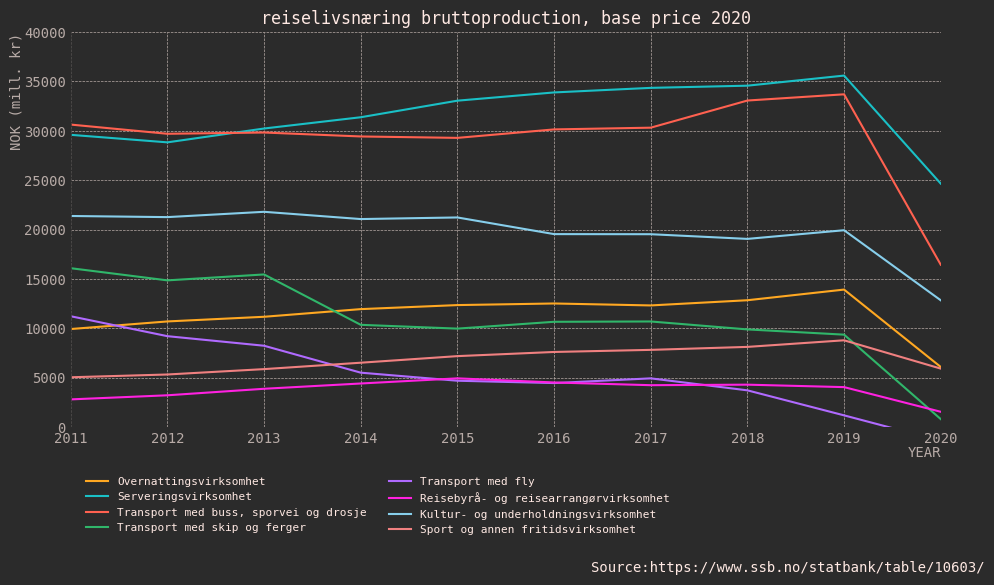

In [472]:
def graph_reiselivsnæring(graphs = [df_overnight,df_service,df_trasport_land,df_trasport_sea,df_trasport_air,df_travel_service,df_entertainmetn,df_sport]):
    # Settup
    graph_Xmin = 2011
    graph_Xmax = 2020
    graph_Ymin = 0
    graph_Ymax = 100
    
    for df_i in graphs:
        max_val = max(df_i['value'])
        if graph_Ymax < max_val:
            graph_Ymax = round(max_val,-4)

    Titel = 'reiselivsnæring bruttoproduction, base price 2020'
    
    #Create
    
    fig, ax = create_ax(x_label='YEAR',
                        y_label='NOK (mill. kr)',
                        lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)],
    )
    
    # Graph
   
    for df_i in graphs:
        ax.plot(df_i["år"],df_i["value"],label = df_i["reiselivsnæring"].iloc[0])

    # Design
    ax.set_title(Titel)
    ax.legend(bbox_to_anchor=(.7,-0.1),frameon=False,ncol=2,prop={'size': 8})
    fig.text(0.6,-0.2,"Source:%s"%(source_ssb_reiselivsN))
    
    return fig,ax

graph_reiselivsnæring()

### Kapittel 1 - Innledning

Når du skal på ferie, så er det flere ting som kan være med på at det stedet du velger blir valgt. Om det er naturen, strendene og havet, heller kulturen og historien, slik områder ofte også har museumer får historien, guided turer slik som hval sightisng i tromsø, heller natur områder slik som parker heller strender. Uansett ka du velger så må de tingene velikesholdes og for det så trenger man penger.

Og det er der turistskatt kommer inn. Tanken er at med å skatte turister med en lokal skatt som kan brukes av staten heller turist organisasjoner så kan intekten fra skatten bli brukt får å velikeholding og mulig utbygging av turist atraksjoner, så i teorien skal det ha en posetive effect på turistmarkedet, flere og bedre atraksjoner betyr flere turister, dermed kan lokal bedriftene tjene mer.

Turistskatt er ofte lagt på toppen av overnatts områder slik som hoteler heller airbnb. Det kan også bli lagt til atraksjoner slik som museumer heller guided turer. 

Så du kan forestil at du bestemer deg å dra på ferie til Tromsø, og når du skjekker inn på hotelet så betaler du en turistskatt når du skjekker inn, og dagen etterpå karnsje du tar deg en guided tur får å se nordlys og der kan det være at du også må betale du en litten extra skatt.

#### Hvor popelert er turistskatt og hvordan gikk det der

#### Posetive og Negative

#### Hvordan vil vi se paa d

### Kapittel 2 - Turistnæringen i Norge

Explane the marked (Choose a marked to foucus on)
Se om vi kan spesifikk se inn paa noen omraader slik som Lofoten siden oppgaven neveder d

Show at spesific data, and show graphs. First general and the spesific

Note fokuser paa hotel og overnatting, men skjekk om eg kan inne nokka fly data faar aa teste fly transport mot trafik.


### Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt

Analyze the marked, some examples:

* Hva er formålet med å innføre en turistskatt på overnattinger?
* Hvordan fungerer markedet for overnattinger uten en skatt?
* Hvilke endringer forventer vi etter at skatten blir innført?
* Hvilke effektivitets- og fordelingseffekter har dette tiltaket?
* Hvor store effekter forventer vi, og hva er dette avhengig av?
* Finnes det noen estimat på sentrale parameter (for eksempel priselastisiteten på etterspørsel etter overnattinger) som vi kan bruke for å konkretisere analysen?
* En vurdering av hvorvidt formålet med tiltaket oppfylles.

I kurset så langt har vi brukt ulike varianter av markedskrysset for å analysere forskjellige markeder, og dette blir verktøyet som brukes her også. Husk å gi en god forklaring av alle figurer som du lager i forbindelse med analysen. Dere har alt dere trenger! (Om du vil gå noe utover det som vi har snakket om i kurset så langt kan det være en idé å se på kapittel 13 i læreboka om "eksterne virkninger").

### Kapittel 4 - Konklusjon


Her oppsummerer du kort dinne funn fra analysen, og råd til Nærings- og fiskeridepartementet.